# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
cities_ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
# uses city type as the index, and counts number of rides for each city type
cities_ride_count

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
cities_driver_count = pyber_data_df.groupby(["type"]).sum()["driver_count"]
# uses city type as the index, and sums total number of drivers for each city type
cities_driver_count

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [5]:
cities_total_fare = pyber_data_df.groupby(["type"]).sum()["fare"]
# uses city type as the index, and sums fare total for each city type
cities_total_fare

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
cities_avg_fare = cities_total_fare / cities_ride_count 
# calculates the average fare per ride. Returns a series with each city type
cities_avg_fare

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [7]:
 cities_driver_fares = cities_total_fare / cities_driver_count
# calculates the average fare per driver. Returns a series with each city type
cities_driver_fares

type
Rural       8.059460
Suburban    2.258615
Urban       0.668675
dtype: float64

In [8]:
pyber_summary_df = pd.DataFrame(columns = ["City Type", "Total Rides", "Total Drivers", "Total Fares",
                                          "Average Fare per Ride", "Average Fare per Driver"])
                                          # create an empty dataframe with column names

pyber_summary_df["City Type"] = pyber_data_df["type"].unique()
pyber_summary_df["Total Rides"] = cities_ride_count.values
pyber_summary_df["Total Drivers"] = cities_driver_count.values
pyber_summary_df["Total Fares"] = cities_total_fare.values
pyber_summary_df["Average Fare per Ride"] = cities_avg_fare.values
pyber_summary_df["Average Fare per Driver"] = cities_driver_fares.values
pyber_summary_df = pyber_summary_df.set_index("City Type")
# fill the dataframe with the values from our series, and format the index to "City Type"

pyber_summary_df.index.name = None
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:.2f}".format)
# format the dataframe

pyber_summary_df
# display

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Urban,125,537,"$4,327.93",$34.62,$8.06
Suburban,625,8570,"$19,356.33",$30.97,$2.26
Rural,1625,59602,"$39,854.38",$24.53,$0.67


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [9]:
## create a dataframe that shows fare sums, separated by city type and date. The double brackets on the sum() function 
## create the dataframe, otherwise it would just return a series

fares_per_type = pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]
# groups entries by the double indices city type and date. Then includes the summed "fare" entries
fares_per_type

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33
...                          ...
Urban 2019-05-08 04:20:00  21.99
      2019-05-08 04:39:49  18.45
      2019-05-08 07:29:01  18.55
      2019-05-08 11:38:35  19.77
      2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [10]:
fares_per_type = fares_per_type.reset_index()
# this function resets our indices so our city type will appear with each row. This is necessary to use pivot()
fares_per_type

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [11]:
fares_per_type_pivot = fares_per_type.pivot(index = "date", columns = "type", values = "fare")
# this will create our pivot table with the index set to 'date', columns set to 'type', and the values the daily fare sums
fares_per_type_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [12]:
date_range_df = fares_per_type_pivot.loc['2019-01-01':'2019-04-29']
# creates a new dataframe based on the given dates
date_range_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [13]:
date_range_df.index = pd.to_datetime(date_range_df.index)
# sets the date index to the datetime datatype. This is necessary to use resample() method to organize by week
date_range_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [14]:
date_range_df.info()
# checks that the datatype for the index is now datetime

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [15]:
date_range_fares_sum = date_range_df.resample('W', loffset='-5d').sum()
# resamples and constructs new dataframe with 'date_range' info organized by week, with fares summed
date_range_fares_sum

C:\Users\jones\AppData\Local\Temp\ipykernel_15472\2139286581.py:1: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  date_range_fares_sum = date_range_df.resample('W', loffset='-5d').sum()


type,Rural,Suburban,Urban
date,,,
2019-01-01,187.92,721.60,1661.68
2019-01-08,67.65,1105.13,2050.43
2019-01-15,306.00,1218.20,1939.02
2019-01-22,179.69,1203.28,2129.51
2019-01-29,333.08,1042.79,2086.94
2019-02-05,115.80,974.34,2162.64
2019-02-12,95.82,1045.50,2235.07
2019-02-19,419.06,1412.74,2466.29
2019-02-26,175.14,858.46,2218.20


In [16]:
## this bit will be our overlayiing lines in our graph

data_values_rural = date_range_fares_sum['Rural']
data_values_suburban = date_range_fares_sum['Suburban']
data_values_urban = date_range_fares_sum['Urban']
# separates the dataframe into individual lists

## this bit will serve as our legend labels. This can be used for any date range, as opposed to just constructing a list
## with the months defined

x_label_dates = date_range_fares_sum.index
# puts the dates from 'date_range_fares_sum' into a datetime array
x_labels = x_label_dates.month_name().unique()
# extracts just the unique month names from the datetime array, places them into a list
x_labels

Index(['January', 'February', 'March', 'April'], dtype='object', name='date')

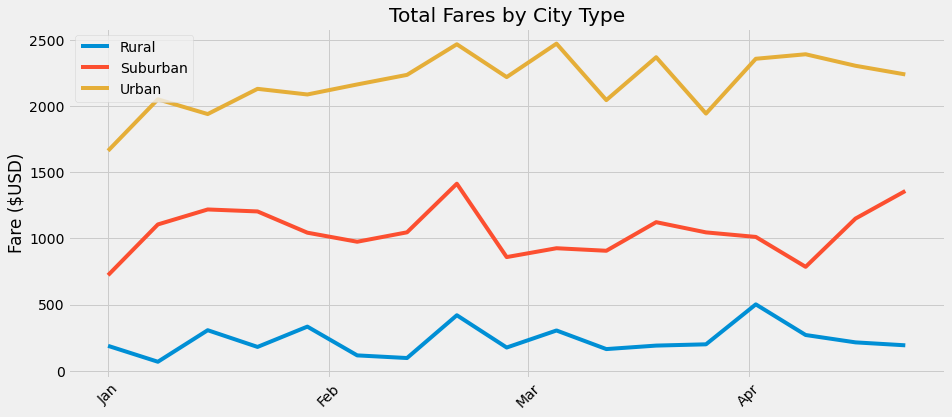

In [17]:
import matplotlib.dates as mdates
# import dates module from matplotlib library
from matplotlib import style
# import style
style.use('fivethirtyeight')
# graph styles

per_city_type_data = [data_values_rural, data_values_suburban, data_values_urban]
# this places our individual lists into an array, to be cycled through
city_type = ["Rural", "Suburban", "Urban"]
# this will serve as our label for each city type
counter = 0
# to reference the index in the 'city_type' list

fig, ax = plt.subplots(figsize = (14,6))
# construct the plot with formatted size
for name in per_city_type_data:
# cycle through our city type data array
    ax.plot(name, label=city_type[counter])
    # plot each city type list as an individual line, and tag with label from 'city_type' list
    counter += 1
    # increment the counter
    
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,12,1)))
# format x-ticks to distribute accurately accros the range of the datasets, return the range of months, incremented by 1
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
# format the x-ticks to spell the month
ax.set_title("Total Fares by City Type")
ax.set_ylabel("Fare ($USD)")
# add title and major y-label
plt.xticks(rotation=45)
# rotate the x-axis ticks 45 degrees
plt.legend()
# insert the legend with our labels defined before
plt.savefig("analysis/PyBer_fare_summary.png")